## EXERCÍCIO 01:   

    A porta mostrada na figura 12 sofre um movimento rotativo em torno do eixo vertical k, cuja equação do movimento é: 

        j * o_ponto_ponto + c_t * o_ponto + k_t * o = 0 

    # Onde:
        
        j = 20 [kg*m]
        c_t = 48 [N*m*/rad]
        k_t = 28,8 [N*m/rad]

    São o movimento de inércia de massa, amortecimento viscoso rotativo do amortecedor e a rigidez rotativa da dobradiça da porta, respectivamente da porta e a rigidez rotativa. Determinar e plotar a resposta, deste sistema dinâmico, em função do tempo, quando a porta está abrindo, e discuta seu movimento.

    Cconsidere as condições iniciais :

        o_0 = 0 [deg]
        o_ponto_0 = 4 [rad/s]
    

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as signal 
from scipy import *
import sympy as sy

In [34]:
# Características do corpo

j = 20.0     # [kg*m]
c_t = 48.0   # [N*m*/rad]
k_t = 28.8 # [N*m/rad]
t = np.linspace(0, 11, 200)

# condições iniciais 
pos_0 = 0 #[deg] 
pos_ponto_0 = 4 #[rad/s] 


#print(t)

In [35]:
# amortecimento crítico	:

c_c = 2 * (k_t*j)**0.5 #[N*s/m]
print(c_c)

# Frequencia natural:

w_n = c_c/(2*j) # [rad/s]
print(w_n)

# Fator de amortecimento:

zeta = c_t/c_c
print(zeta)

48.0
1.2
1.0


In [36]:
# Raizes da equação característica:

s_1 = (-zeta +((-1)**0.5)*(1-zeta**2)**0.5)*w_n
s_2 = (-zeta -((-1)**0.5)*(1-zeta**2)**0.5)*w_n
print(s_1)
print(s_2)
r = np.roots([j, c_t, k_t]) # utilizando a biblioteca numpy
print(r)

(-1.2+0j)
(-1.2+0j)
[-1.2 -1.2]


In [37]:
if zeta < 1 or c_t < c_c or c_t/2*j <(k_t/j)**0.5: # sistema subamortecido { zeta <1 ou c<Cc ou (c/2*m) < (k/m)ˆ0,5	}

    #calculo das raizes:

    #s_1 = (-zeta +((-1)**0.5)*(1-zeta**2)**0.5)*w_n
    #s_2 = (-zeta -((-1)**0.5)*(1-zeta**2)**0.5)*w_n
    
    #frequencia natural de amortecimento, frenquencia de vibração amortecida:

    w_d = ((1-zeta**2)**0.5)*w_n
    print(w_d)

    #Constantes arbitrárias
    c_11 = pos_0
    c_22 = ( pos_ponto_0 + zeta*w_n*pos_0 ) / ((1-zeta**2)**0.5)*w_n
    x_0 = ((c_11)**2 +(c_22)**2)**0.5
    x = x_0 
    phi = np.arctan(c_11/c_22)
    phi_0 = np.arctan(-c_22/c_11)

    # solução:
    
    pos = []

    pos = np.exp(-zeta*w_n*t) * ( c_11*np.cos(((1-zeta**2)**0.5)*w_n*t) + c_22*np.sin(((1-zeta**2)**0.5)*w_n*t) ) 

    vel = -w_n*zeta*(c_11*np.cos(t*w_n*(1 - zeta**2)**0.5)+c_22*np.sin(t*w_n*(1 - zeta**2)**0.5))*np.exp(-t*w_n*zeta) + (-c_11*w_n*(1 - zeta**2)**0.5*np.sin(t*w_n*(1- zeta**2)**0.5) + c_22*w_n*(1 - zeta**2)**0.5 * np.cos(t*w_n*(1-zeta**2)**0.5))*np.exp(-t*w_n*zeta)
    
    acel = w_n**2(zeta**2*(c_11*np.cos(t*w_n*(1-zeta**2)**0.5) + c_22*np.sin(t*w_n*(1-zeta**2)**0.5)) + 2*zeta*(1-zeta**2)**0.5*(c_11*np.sin(t*w_n*(1-zeta**2)**0.5) - c_22*np.cos(t*w_n*(1-zeta**2)**0.5)) - (1-zeta**2)**1.0(c_11*np.cos(t*w_n*(1-zeta**2)**0.5) + c_22*np.sin(t*w_n*(1-zeta**2)**0.5)))*np.exp(-t*w_n*zeta)
                                                                          
    #pos = x*np.exp**(-zeta*w_n*t)*np.sin(((1-zeta**2)**0.5)*w_n*t + phi)

    #pos = x_0*np.exp**(-zeta*w_n*t)*np.cos(((1-zeta**2)**0.5)*w_n*t + phi_0)

    # O movimento descrito é um movimento harmônico amortecido de frenquencia angular, porém devido sua exponencial negativa, a amplitude diminui com o tempo.


elif zeta == 1 or c_t == c_c or	(c_t/2*j) == ((k_t/k)**0.5): # sistema criticamente amortecido { zeta=1 ou c=Cc ou	c/2*m = (k/m)ˆ0,5 }

    #calculo das raizes:

    #s_1 = (-zeta +((-1)**0.5)*(1-zeta**2)**0.5)*w_n
    #s_2 = (-zeta -((-1)**0.5)*(1-zeta**2)**0.5)*w_n
    #s_1 = s_2 = - c_c/2*j = -w_n
    

    #frequencia natural de amortecimento:

    w_d = ((1-zeta**2)**0.5)*w_n
    print(w_d)

    #Constantes arbitrárias
    c_1 = pos_0
    c_2 = (pos_ponto_0 + w_n*pos_0)
    

    # solução:

    #pos = (c_1 + c_2*t)*np.exp**(-w_n*t)

    pos = (pos_0 + (pos_ponto_0 + w_n*pos_0)*t)*np.exp(-w_n*t)

    vel = -w_n*(pos_0 + t * (pos_0*w_n + pos_ponto_0))*np.exp( - t*w_n) + (pos_0*w_n + pos_ponto_0)*np.exp(-t*w_n)
    
    acel = w_n**2*(pos_0 + t*(pos_0*w_n + pos_ponto_0))*np.exp(-t*w_n) - 2*w_n*(pos_0*w_n + pos_ponto_0)*np.exp(-t*w_n)

    # O movimento representado pela equação é aperiódico. devido a exponecial tendender a zero ao passo que o tempo tende ao infinito, o movimento eventualmente diminuirá até zero

elif zeta > 1 or c_t > c_c	or (c_t/2*j) > ((k_t/j)**0.5): # sistema superamortecido { zeta>1 ou c>Cc	ou c/2*m = (k/m)ˆ0,5 }

    #calculo das raizes:

    #s_1 = (-zeta +((-1)**0.5)*(1-zeta**2)**0.5)*w_n < 0
    #s_2 = (-zeta -((-1)**0.5)*(1-zeta**2)**0.5)*w_n < 0
    #s_2 << s_1  
    

    #frequencia natural de amortecimento:

    w_d = ((1-zeta**2)**0.5)*w_n
    print(w_d)

    #Constantes arbitrárias
    
    c_1 = (pos_0*w_n*(zeta + (zeta**2 - 1)**0.5) + pos_ponto_0) / ((2*w_n)*(zeta**2 - 1)**0.5) 
    c_2 = (- pos_0*w_n*(zeta - (zeta**2 - 1)**0.5) - pos_ponto_0) / ((2*w_n)*(zeta**2 - 1)**0.5)

    # solução:

    pos = c_1*np.exp((- zeta + (-1 + zeta**2)**0.5)*w_n*t) + c_2*np.exp((- zeta - (-1 + zeta**2)**0.5)*w_n*t)

    vel = c_1*w_n*(-zeta + (zeta**2 -1)**0.5)*np.exp(t*w_n*(-zeta + (zeta**2-1)**0.5)) + c_2*w_n*(-zeta-(zeta**2 -1)**0.5)*np.exp(t*w_n*(-zeta-(zeta**2 -1)**0.5))

    acel = w_n**2*(c_1*(zeta - (zeta**2 -1)**0.5))**2 * np.exp(-t*w_n*(zeta-(zeta**2 -1)**0.5)) + c_2*(zeta+(zeta**2-1)**0.5)**2 * np.exp(-t*w_n*(zeta+(zeta**2-1)**0.5))


    #A equação mostra que o movimento é aperiódico, independente das condições iniciais impostas ao sistema. Visto que as raízes sao ambas negativas, o movimento diminui exponencialmente com o tempo.


0.0


<>:29: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:29: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:29: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:29: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
C:\Users\Desktop\AppData\Local\Temp\ipykernel_16228\2833766828.py:29: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  acel = w_n**2(zeta**2*(c_11*np.cos(t*w_n*(1-zeta**2)**0.5) + c_22*np.sin(t*w_n*(1-zeta**2)**0.5)) + 2*zeta*(1-zeta**2)**0.5*(c_11*np.sin(t*w_n*(1-zeta**2)**0.5) - c_22*np.cos(t*w_n*(1-zeta**2)**0.5)) - (1-zeta**2)**1.0(c_11*np.cos(t*w_n*(1-zeta**2)**0.5) + c_22*np.sin(t*w_n*(1-zeta**2)**0.5)))*np.exp(-t*w_n*zeta)
C:\Users\Desktop\AppData\Local\Temp\ipykernel_16228\2833766828.py:29: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  acel = w_n**2(zeta**2*(c_11*np.cos(t*w_n*(1-zeta**2)**0.5) + c_22*np.

In [ ]:
def f(t):
    return pos

In [38]:
#veloc = np.gradient(pos, t)
#aceler = np.gradient(veloc, t)

#print(veloc)
#np.shape(veloc)


In [ ]:
#vel = c_1*w_n*(-zeta + (zeta**2 -1)**0.5)*np.exp(t*w_n*(-zeta + (zeta**2-1)**0.5)) + c_2*w_n*(-zeta-(zeta**2 -1)**0.5)*np.exp(t*w_n*(-zeta-(zeta**2 -1)**0.5))

#acel = w_n**2*(c_1*(zeta - (zeta**2 -1)**0.5))**2 * np.exp(-t*w_n*(zeta-(zeta**2 -1)**0.5)) + c_2*(zeta+(zeta**2-1)**0.5)**2 * np.exp(-t*w_n*(zeta+(zeta**2-1)**0.5))


In [ ]:
#t, pos_0, pos_ponto_0, w_n, zeta, c_11, c_22, c_1, c_2= sy.symbols('t pos_0 pos_ponto_0 w_n zeta c_11 c_22 c_1 c_2')

#sy.diff(c_1*sy.exp((- zeta + (-1 + zeta**2)**0.5)*w_n*t) + c_2*sy.exp((- zeta - (-1 + zeta**2)**0.5)*w_n*t), t, 2)

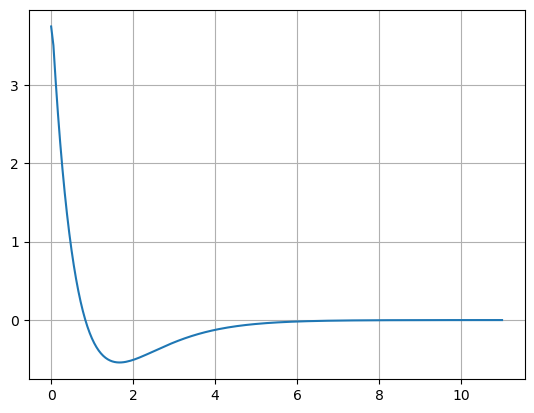

In [41]:
#plt.plot(t, veloc)
#plt.grid(True)
#plt.show()

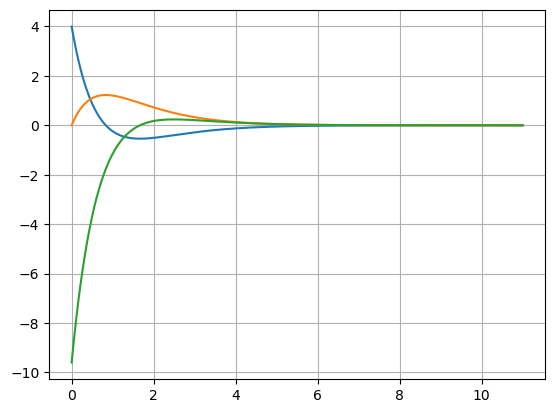

In [42]:
plt.plot(t, vel)
plt.plot(t, pos)
plt.plot(t, acel)
plt.grid(True)
plt.show()

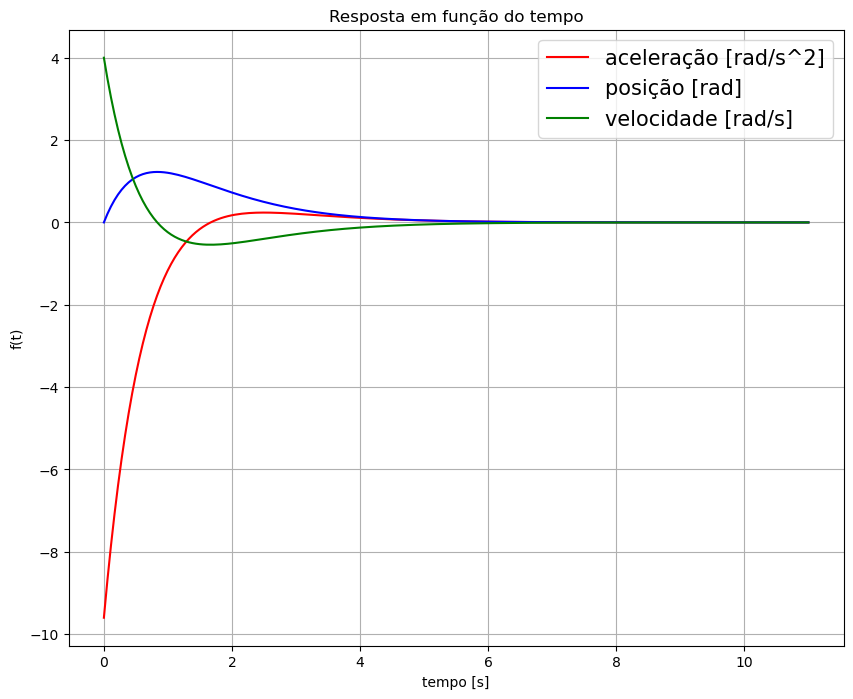

In [43]:
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(10,8)) 

axs.plot(t, acel, label='aceleração [rad/s^2]',color='red')
axs.plot(t, pos, label='posição [rad]',color='blue')
axs.plot(t, vel, label='velocidade [rad/s]',color='green')

#plt.plot(t, pos)
#plt.plot(t, veloc)
#lt.plot(t, aceler)

axs.legend(fontsize=30)
plt.legend(loc='upper right', fontsize=15)

axs.set_title('Resposta em função do tempo')
axs.set_xlabel('tempo [s]')
axs.set_ylabel('f(t)')

plt.grid(True)
plt.show()

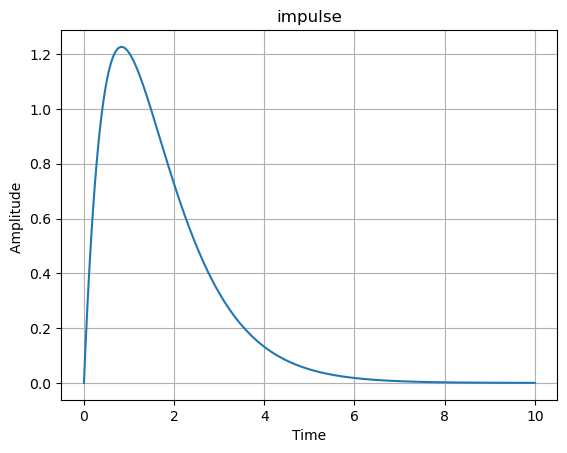

In [13]:
numerador = [pos_ponto_0]
denominador = [1, 2*zeta*w_n, w_n**2]
system = signal.lti(numerador, denominador)

t = np.linspace(0, 10, num=500)
t, response = signal.impulse(system, T=t, X0=None)

plt.plot(t, response)
plt.xlabel('Time')
plt.ylabel('Amplitude ')
plt.title('impulse')
plt.grid(True)
plt.show()

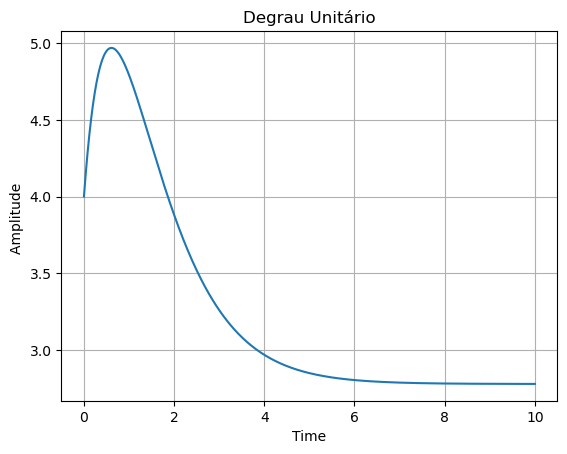

In [12]:
numerador = [pos_ponto_0]
denominador = [1, 2*zeta*w_n, w_n**2]
system = signal.lti(numerador, denominador)

t = np.linspace(0, 10, num=500)
t, response = signal.step(system, T=t, X0=1)

plt.plot(t, response)
plt.xlabel('Time')
plt.ylabel('Amplitude ')
plt.title('Degrau Unitário')
plt.grid(True)
plt.show()

In [10]:
v= []
a = []
v = 4*np.exp(-1.2*t) - 1.2*np.exp(-1.2*t)*4*t
a = 4.8*np.exp(-1.2*t)*(-1 + 1.2*t -1)
p = 4*t*np.exp(-1.2*t)



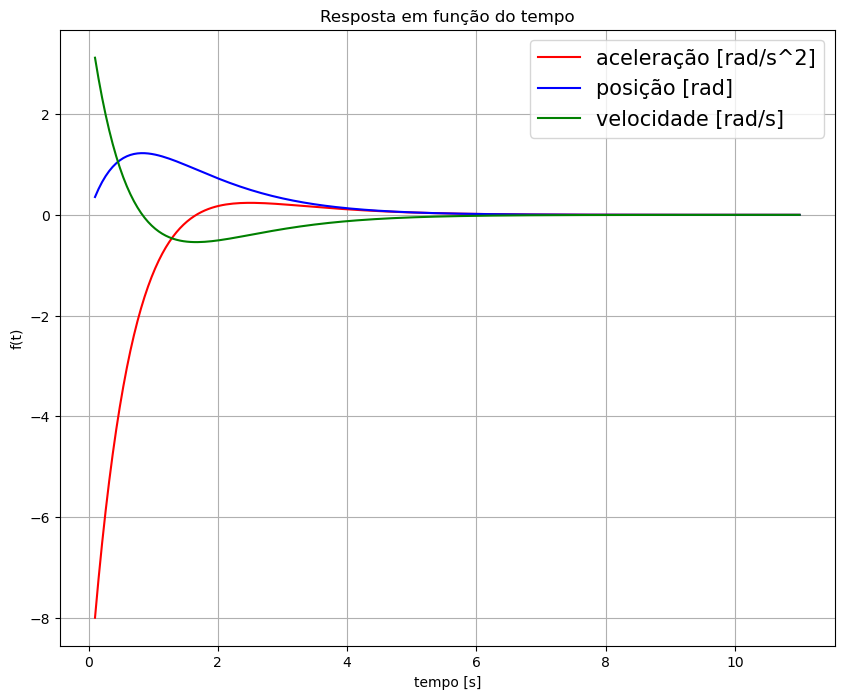

In [11]:
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(10,8)) 

axs.plot(t, a, label='aceleração [rad/s^2]',color='red')
axs.plot(t, p, label='posição [rad]',color='blue')
axs.plot(t, v, label='velocidade [rad/s]',color='green')

axs.legend(fontsize=30)
plt.legend(loc='upper right', fontsize=15)

axs.set_title('Resposta em função do tempo')
axs.set_xlabel('tempo [s]')
axs.set_ylabel('f(t)')


#plt.plot(t, pos)
#plt.plot(t, veloc)
#plt.plot(t, aceler)
plt.grid(True)
plt.show()